In [1]:
import csv
import matplotlib.pyplot as plt

def plot_csv(path):
    """
    Plots column 1 (index 0) on the x-axis and column 2 (index 1) on the y-axis.
    • If x resets to 0 after previously increasing, a new line segment is started
      and drawn in a different colour.
    • Rows with fewer than four columns are skipped.
    """
    segments = []          # will hold successive (xs, ys) lists
    xs, ys = [], []        # current segment’s data

    with open(path, newline='') as f:
        rdr = csv.reader(f)
        for row in rdr:
            # 1. Skip rows with < 4 columns
            if len(row) < 4:
                continue
            try:
                x = float(row[0])
                y = float(row[1])
            except ValueError:          # non-numeric entries → skip row
                continue

            # 2. Detect a restart of the x-axis
            if xs and x == 0:
                segments.append((xs, ys))
                xs, ys = [], []

            xs.append(x)
            ys.append(y)

    # append the last collected segment
    if xs:
        segments.append((xs, ys))

    # 3. Plot each segment in a different colour
    colour_cycle = plt.cm.tab10.colors  # up to 10 distinct colours
    for i, (seg_x, seg_y) in enumerate(segments):
        plt.plot(seg_x, seg_y,
                 color=colour_cycle[i % len(colour_cycle)],
                 label=f"segment {i + 1}")

    plt.xlabel("Column 1 (x)")
    plt.ylabel("Column 2 (y)")
    plt.title("CSV plot with colour change on x reset")
    if len(segments) > 1:
        plt.legend()
    plt.tight_layout()
    plt.show()


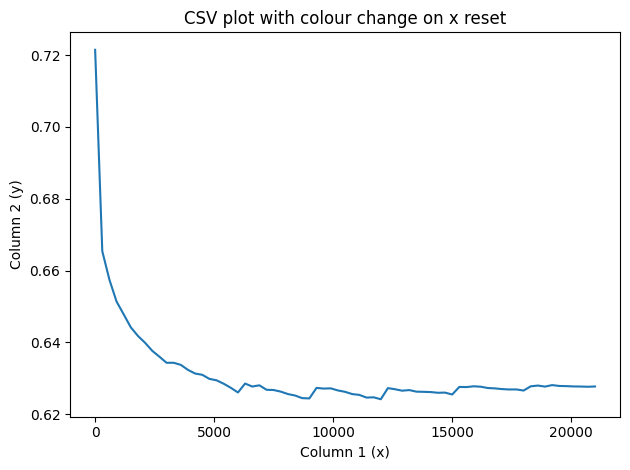

In [2]:
plot_csv("data.csv")


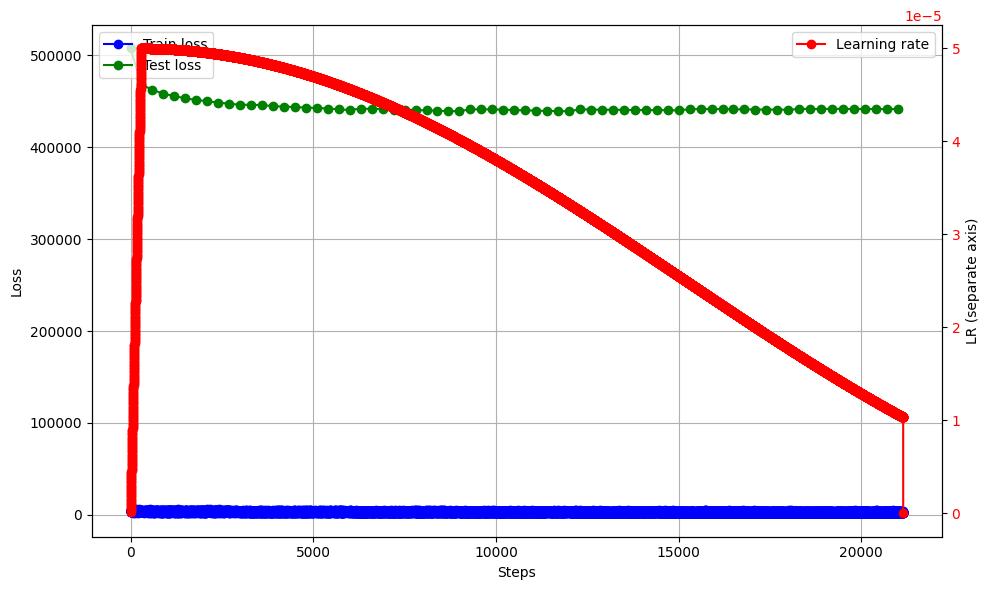

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("train_log.csv", header=None, names=["x", "y1", "y2", "y3"])

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot y1 and y2 on the primary y-axis
ax1.plot(df["x"], df["y1"], label="Train loss", marker='o', color='blue')
ax1.plot(df["x"][df["y2"].notna()], df["y2"].dropna(), label="Test loss", marker='o', color='green')

ax1.set_xlabel("Steps")
ax1.set_ylabel("Loss")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create secondary y-axis for y3
ax2 = ax1.twinx()
ax2.plot(df["x"], df["y3"], label="Learning rate", marker='o', color='red')
ax2.set_ylabel("LR (separate axis)")
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Final layout
plt.tight_layout()
plt.show()


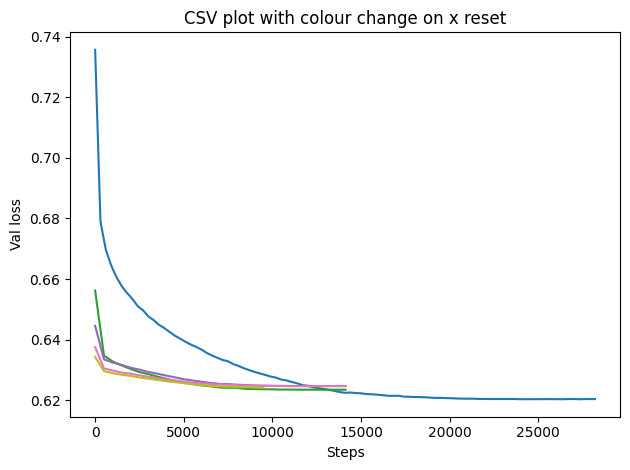

In [10]:
import csv
import matplotlib.pyplot as plt

def plot_csv(path):
    """
    Plots column 1 (index 0) on the x-axis and column 2 (index 1) on the y-axis.
    • If x resets to 0 after previously increasing, a new line segment is started
      and drawn in a different colour.
    • Rows with fewer than four columns are skipped.
    """
    segments = []          # will hold successive (xs, ys) lists
    xs, ys = [], []        # current segment’s data

    with open(path, newline='') as f:
        rdr = csv.reader(f)
        for row in rdr:
            # 1. Skip rows with < 4 columns
            if len(row) < 4:
                continue
            try:
                x = float(row[0])
                y = float(row[1])
            except ValueError:          # non-numeric entries → skip row
                continue

            # 2. Detect a restart of the x-axis
            if xs and x == 0:
                segments.append((xs, ys))
                xs, ys = [], []

            xs.append(x)
            ys.append(y)

    # append the last collected segment
    if xs:
        segments.append((xs, ys))

    # 3. Plot each segment in a different colour
    colour_cycle = plt.cm.tab10.colors  # up to 10 distinct colours
    for i, (seg_x, seg_y) in enumerate(segments):
        plt.plot(seg_x, seg_y,
                #  color=colour_cycle[i % len(colour_cycle)],
                 label=f"segment {i + 1}")


plot_csv("r0.csv")
plot_csv("r1.csv")
plot_csv("r2.csv")
plot_csv("r3.csv")
plot_csv("r4.csv")

plt.xlabel("Steps")
plt.ylabel("Val loss")
# plt.legend(['Round 0', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
plt.title("CSV plot with colour change on x reset")
plt.tight_layout()
plt.show()
